In [5]:
import os
import cv2
import numpy as np

from ultralytics import YOLO
from pathlib import Path
from matplotlib import pyplot as plt

In [6]:
IMAGE_DIR = Path("dataset/images2") # Folder with your images
label_dir = ("dataset/labels2") # Where to save YOLO labels
model_name = "yolov8x.pt"         # Try yolov8m.pt or yolov8x.pt for better accuracy

# Load YOLO model
model = YOLO(model_name)

# Run inference
results = model(source=str(IMAGE_DIR), save_txt=True, project=str(label_dir), name=".")


image 1/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.0.jpg: 480x640 1 person, 1 cat, 692.3ms
image 2/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.1.jpg: 608x640 1 cat, 804.6ms
image 3/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.10.jpg: 640x640 1 cat, 817.3ms
image 4/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.100.jpg: 640x544 1 person, 1 cat, 725.2ms
image 5/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.11.jpg: 640x640 1 bench, 1 cat, 819.4ms
image 6/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.12.jpg: 480x640 1 cat, 1 bowl, 1 bed, 632.0ms
image 7/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.13.jpg: 416x640 1 cat, 549.9ms
image 8/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.14.jpg: 544x640 1 cat, 700.8ms
image 9/202 c:\Users\SLY\Desktop\objectdetectionmodel\dataset\images2\cat.15.jpg: 576x640 1 cat, 728.9ms
image 10/20

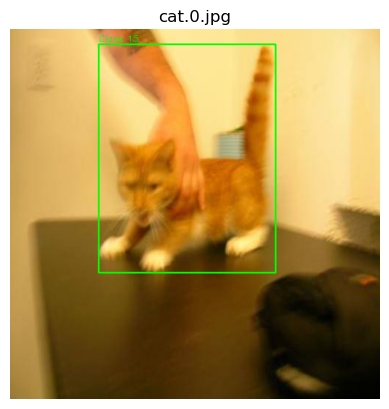

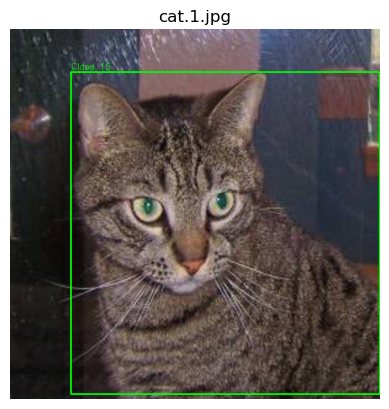

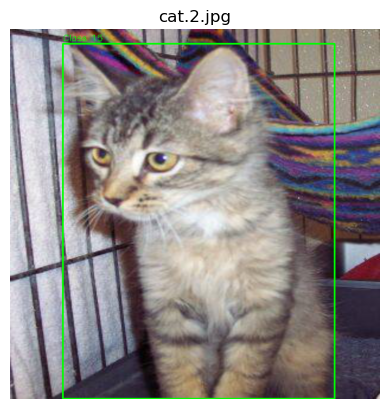

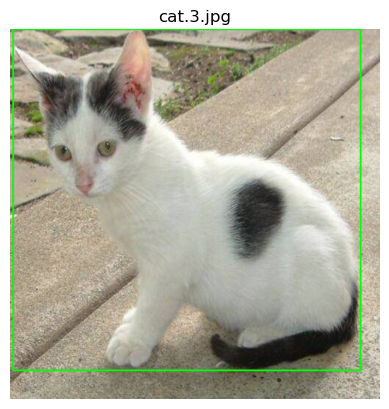

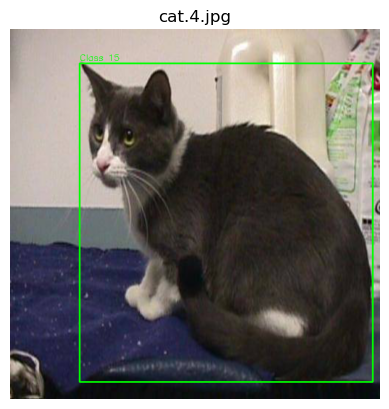

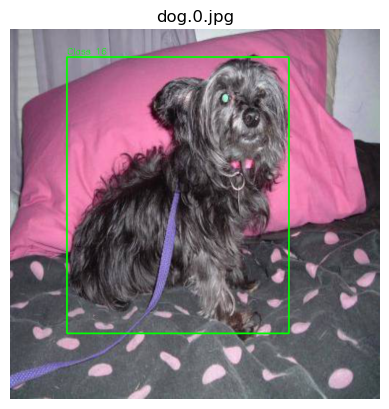

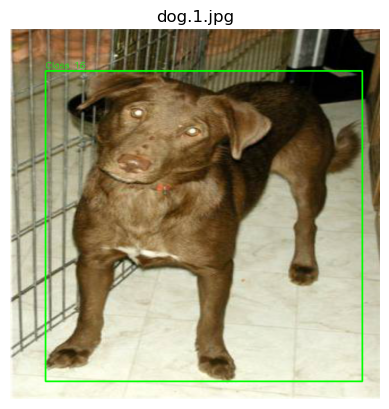

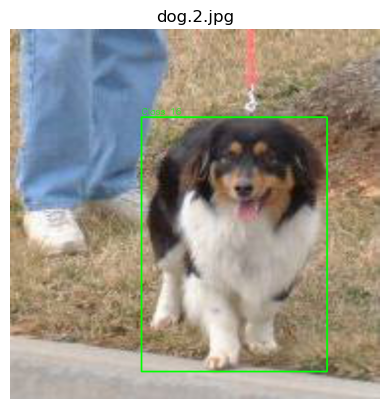

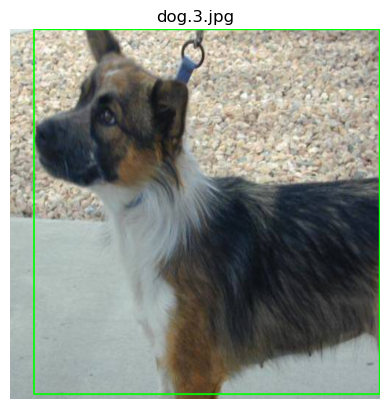

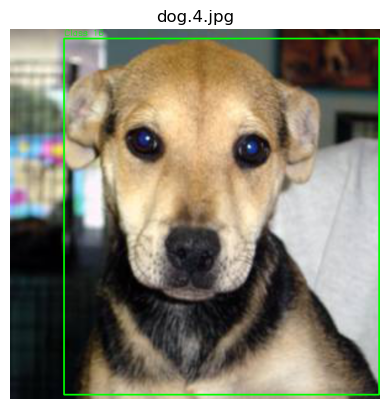

In [ ]:
LABEL_DIR = 'dataset/yololabels/labels'
IMG_SIZE = (640, 640)  # Resize if needed

def load_and_display(image_filename):
    image_path = os.path.join(IMAGE_DIR, image_filename)
    label_path = os.path.join(LABEL_DIR, os.path.splitext(image_filename)[0] + ".txt")

    img = cv2.imread(image_path)
    img = cv2.resize(img, IMG_SIZE)

    imageHeight, imageWidth, _ = img.shape

    # Draw boxes
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                class_id, x_center, y_center, width, height = map(float, parts)

                # Convert from YOLO format to pixel coordinates
                x_center *= imageWidth
                y_center *= imageHeight
                width *= imageWidth
                height *= imageHeight

                x_min = int(x_center - width / 2)
                y_min = int(y_center - height / 2)
                x_max = int(x_center + width / 2)
                y_max = int(y_center + height / 2)
                
                # Draw rectangle and class label
                cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                cv2.putText(img, f"Class {int(class_id)}", (x_min, y_min - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(image_filename)
    plt.show()

# Iterate through all images and display
for image_file in os.listdir(IMAGE_DIR):
    if image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
        load_and_display(image_file)
